In [1]:
#import lfw dataset from sklearn
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize = 0.4, color = True)

#parameter of 'slice' defaults to slice_:(slice(70[start], 195[stop], None[steps]), slice(78, 172, None)
#therefore the new images are 125(195-70)x94(172-78) with resize = 1 (no resizing) 

#print out the names of the people in our fetched set
for i in lfw_people.target_names:
    print (i)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [3]:
lfw_people.images.shape

(1288, 50, 37, 3)

In [0]:
#format data
lfw_people.images.shape
n_samples, h,w,d=lfw_people.images.shape

#defining varibles
X=lfw_people.data
n_features=X.shape[1]
y=lfw_people.target
target_names=lfw_people.target_names
n_classes=target_names.shape[0]


In [5]:
#Question: h and w are the height and width of the pictures? They correspond 
# to the size of the reshape matrix?
h, w,n_classes, d

(50, 37, 7, 3)

In [0]:
#import the train test split selection library 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#using sklearn split the data into training and test set
#one set designed for training and another one for validation
#in this case we are using 70% as training and 30% is being left out for validation
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=42)

In [7]:
#import to_categorical which is a way to hot encode the variables in order to use 
#them in the CNN thus convert the class labels into a one-hot encoding vector
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

Using TensorFlow backend.


In [8]:
#check shape
y_train.shape
y_test.shape

(387,)

In [11]:
# Display the first image in training data
#plt.subplot(121)
#plt.imshow(X_train[0].reshape((h, w)), cmap='gray')
#plt.title("Ground Truth : {}".format(y_train[0]))

#convert each 28 x 28 image of the train and test set into a matrix of size 
#h x w x 1 which is fed into the network
X_train1=X_train.reshape(-1, h,w, 3)
X_test1=X_test.reshape(-1,h,w,3)

X_train1.shape

#convert to float32 data type so that the neural network can handle it
X_train1=X_train1.astype('float32')
X_test1=X_test1.astype('float32')

#rescale the pixel values in range 0 - 1 inclusive
X_train1=X_train1/255
X_test1=X_test1/255

#display the shapes of the train and test and the encoded train and test
X_train1.shape, X_test1.shape, train_Y_one_hot.shape, test_Y_one_hot.shape

((901, 50, 37, 3), (387, 50, 37, 3), (901, 7), (387, 7))

In [0]:
#import all the necessary modules required to train the model
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import h5py
from time import time
from keras.callbacks import TensorBoard

In [0]:
#batch size of 64 using a higher batch size of 128 or 256 is also preferable 
#it all depends on the memory. It contributes massively to determining the 
#learning parameters and affects the prediction accuracy. (essentially how big or 
#small of steps the model is taking to learn)
# num_classes is dependent on how many classes(unique people) we had when we 
#specified our fetch
batch_size = 256
epochs = 50
num_classes = 7

In [15]:
#Question: is this saying that we have 3 hidden layers
### yes, 3 convolution layers
### The first layer will have 32-3 x 3 filters,
### The second layer will have 64-3 x 3 filters and
### The third layer will have 128-3 x 3 filters.
### plus three max-pooling layers each of size 2 x 2.

tsface_model = Sequential()
tsface_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,37,3)))
tsface_model.add(LeakyReLU(alpha=0.1))
tsface_model.add(MaxPooling2D((2, 2),padding='same'))
tsface_model.add(Dropout(0.25))
tsface_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
tsface_model.add(LeakyReLU(alpha=0.1))
tsface_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
tsface_model.add(Dropout(0.25))
tsface_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
tsface_model.add(LeakyReLU(alpha=0.1))                  
tsface_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
tsface_model.add(Dropout(0.4))
tsface_model.add(Flatten())
tsface_model.add(Dense(128, activation='linear'))
tsface_model.add(LeakyReLU(alpha=0.1))           
tsface_model.add(Dropout(0.3))
tsface_model.add(Dense(num_classes, activation='softmax'))

tsface_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

tensorboard = TensorBoard(log_dir="/home/cc/TensorBoard/".format(time()), write_images=True, write_graph=True)

tsface_train_dropout = tsface_model.fit(X_train1, train_Y_one_hot, batch_size=batch_size, callbacks = [tensorboard], epochs=5,verbose=1,validation_data=(X_test1, test_Y_one_hot))
#!!! I don't know if we should be using the test set as the validation set -------------------------------------------------------^ here
### I think using the test set for validation is a good place to start,
### I think if our accuracy rates aren't ideal we should focus on adjusting 
### the parameters before we worry about trying to get more data for a validation set
tsface_model.save("tsface_train_dropout.h5py")

Train on 901 samples, validate on 387 samples
Epoch 1/5
901/901 [==============================] - 7s 7ms/step - loss: 1.8374 - acc: 0.3074 - val_loss: 1.8105 - val_acc: 0.4289
Epoch 2/5
901/901 [==============================] - 6s 7ms/step - loss: 1.7091 - acc: 0.4040 - val_loss: 1.7211 - val_acc: 0.4289
Epoch 3/5
901/901 [==============================] - 6s 7ms/step - loss: 1.7155 - acc: 0.4040 - val_loss: 1.7964 - val_acc: 0.4289
Epoch 4/5
901/901 [==============================] - 6s 7ms/step - loss: 1.6956 - acc: 0.4051 - val_loss: 1.7493 - val_acc: 0.4289
Epoch 5/5
901/901 [==============================] - 6s 7ms/step - loss: 1.7032 - acc: 0.4040 - val_loss: 1.7524 - val_acc: 0.4289


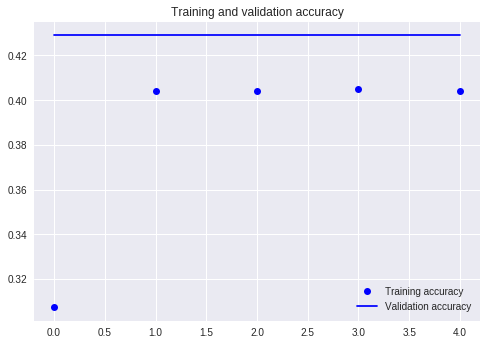

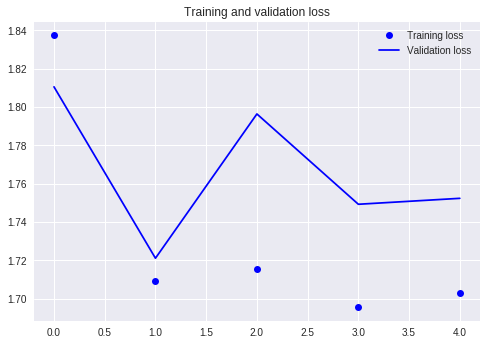

In [16]:
accuracy = tsface_train_dropout.history['acc']
val_accuracy = tsface_train_dropout.history['val_acc']
loss = tsface_train_dropout.history['loss']
val_loss = tsface_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
#Find the predicted classes counts from the testing set
predicted_classes = tsface_model.predict(X_test1)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((387,), (387,))

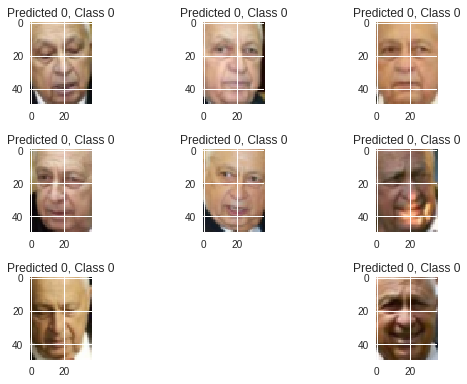

In [19]:
#calculate the correct predicted classes and display
correct = np.where(predicted_classes==y_test)[0]
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test1[correct].reshape(50,37,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

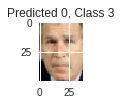

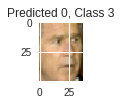

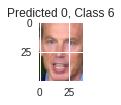

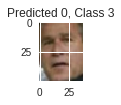

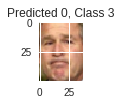

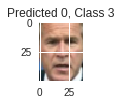

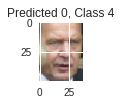

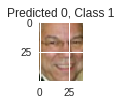

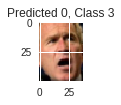

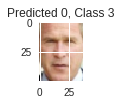

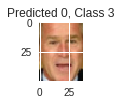

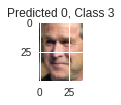

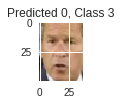

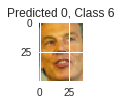

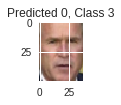

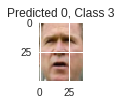

In [20]:
#calculate the incorrect prediction classes in the test set and display
incorrect = np.where(predicted_classes!=y_test)[0]
for i, incorrect in enumerate(incorrect[:16]):
    plt.figure(figsize=(10,5))
    plt.subplot(4,4,i+1)
    plt.imshow(X_test1[incorrect].reshape(50,37,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    

In [21]:
#get the overall accuracy
score = tsface_model.evaluate(X_test1, test_Y_one_hot, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#get the prediction
#Question: It seems predicted_classes up above is performing the same operation
#as predictions (can we take out this line and replace predictions with 
#preicted_classes or alternatively up above change predicted_classes to predictions?)
predictions = tsface_model.predict(X_test1)
#print('First prediction:', predictions[0])
predicted_classes = np.argmax(np.round(predictions),axis=1)

#correct and incorrect were already calculated I think we can take them out here and
#just keep the print statements.
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

#import the classification_report to see the accuracy breakdown by class predictions
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

#Question: the Test loss is the amount of differecnce between test and true outcome?

387/387 [==============================] - 1s 2ms/step
Test loss: 1.7523730639031383
Test accuracy: 0.4289405684754522
Found 18 correct labels
Found 369 incorrect labels
              precision    recall  f1-score   support

     Class 0       0.05      1.00      0.09        18
     Class 1       0.00      0.00      0.00        69
     Class 2       0.00      0.00      0.00        34
     Class 3       0.00      0.00      0.00       166
     Class 4       0.00      0.00      0.00        31
     Class 5       0.00      0.00      0.00        19
     Class 6       0.00      0.00      0.00        50

   micro avg       0.05      0.05      0.05       387
   macro avg       0.01      0.14      0.01       387
weighted avg       0.00      0.05      0.00       387



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
